### Student Information
Name:葉偉良

Student ID:108065511

GitHub ID: 55986614

Kaggle name: Kenneth Yap

Kaggle private scoreboard snapshot:

[Snapshot](img/score.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

---

<div style="background-color:lightblue;">
    <center>
        <h3 style="color:red; font-size:24px; font-family:Segoe Print;">Take Home Exercises</h3>
    </center>
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 1</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [2]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [3]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

<font style="font-size:15px; font-family:Comic Sans MS;">My answer</font>

In [4]:
import numpy as np

X_text_train = train_df['text'].values
X_text_test = test_df['text'].values
X_text_mix = np.concatenate((X_text_train, X_text_test))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv_train = CountVectorizer()
count_train = cv_train.fit_transform(X_text_train)

cv_test = CountVectorizer()
count_test = cv_test.fit_transform(X_text_test)

cv_mix = CountVectorizer()
count_mix = cv_mix.fit_transform(X_text_mix)

In [6]:
tf_train = np.asarray(count_train.sum(axis=0))[0]
tf_test = np.asarray(count_test.sum(axis=0))[0]
tf_mix = np.asarray(count_mix.sum(axis=0))[0]

#Makes the list into pandas dataframe
dfTF_train = pd.DataFrame({'Terms' : cv_train.get_feature_names(), 'Freq'  : tf_train})
dfTF_train.sort_values(by=['Freq'], inplace=True, ascending=False)

dfTF_test = pd.DataFrame({'Terms' : cv_test.get_feature_names(), 'Freq'  : tf_test})
dfTF_test.sort_values(by=['Freq'], inplace=True, ascending=False)

dfTF_mix = pd.DataFrame({'Terms' : cv_mix.get_feature_names(), 'Freq'  : tf_mix})
dfTF_mix.sort_values(by=['Freq'], inplace=True, ascending=False)

In [7]:
from matplotlib import pyplot as plt

dfs = [dfTF_train, dfTF_test, dfTF_mix]
titles = ['Training datasets top30 words', 'Testing datasets top30 words', 'Training and testing datasets top30 words']
color = ['#d9534f', '#337ab7','#449d44']
Len = len(dfs)

plt.figure(figsize=(15,15))
for i in range(Len):
    x = dfs[i]['Terms'].values[:30].tolist()
    y = dfs[i]['Freq'].values[:30].tolist()

    plt.subplot(Len, 1, i + 1)
    plt.title(titles[i])
    plt.bar(x, y, color=color[i])
    
plt.show()

<Figure size 1500x1500 with 3 Axes>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 2</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">My answer</font>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
vectorizer1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
vectorizer1000.fit(train_df['text'])

train_data_tfidf_features_1000 = vectorizer1000.transform(train_df['text'])

## check dimension
train_data_tfidf_features_1000.shape

(3613, 1000)

In [9]:
# observe some feature names
feature_names_1000 = vectorizer1000.get_feature_names()
"😂" in feature_names_1000

True

In [10]:
feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 3</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [13]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

In [14]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.64


In [15]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [16]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [17]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

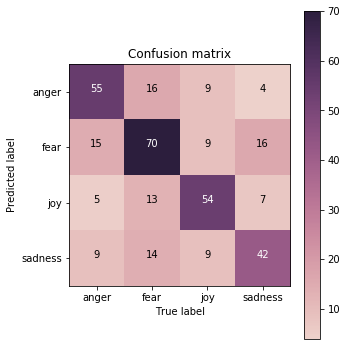

In [18]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

<font style="font-size:15px; font-family:Comic Sans MS;">My answer</font>

<font style="font-size:15px; font-family:Comic Sans MS;">Those 84 labels are 'anger', 113 labels are 'fear', 81 labels are 'joy' and 69 labels are 'sadness'. However, 55 labels of 'anger', 70 labels of 'fear', 54 labels of 'joy' and 42 labels of 'sadness' are predicted to truth label</font>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 4</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">My answer</font>

In [19]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [20]:
from sklearn.naive_bayes import MultinomialNB
NBmodel = MultinomialNB().fit(X_train, y_train)

y_pred_train = NBmodel.predict(X_train)
y_pred_test = NBmodel.predict(X_test)

print("Training Accuracy : %.4f" %accuracy_score(y_pred_train, y_train))
print("Testing Accuracy : %.4f" %accuracy_score(y_pred_test, y_test))

Training Accuracy : 0.7930
Testing Accuracy : 0.7176


In [21]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



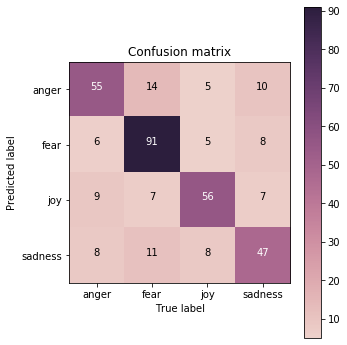

In [22]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 5</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">My answer</font>

<font style="font-size:15px; font-family:Comic Sans MS;">Let's show the result of Naive Bayes and Decision Tree</font>
<table style="float:left; width:70%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b></b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DECISION TREE</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>NAIVE BAYES</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Training Accuracy</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>99.0%</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>79.30%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Testing Accuracy</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>64.0%</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>71.76%</b>
        </td>
    </tr>
</table>

<font style="font-size:20px; font-family:Andale Mono,monospace;">From the table above, we could see that the decision tree had a great training accuracy than the Naive Bayes does. However, Naive Bayes achieved a higher testing accuracy. Notice that there is much different on training accuracy and testing accuracy when using Decision Tree. This situation calls OVERFITTING, which means the model is too much relieve on the training dataset.In this case, the model wouldn't have a high accuracy when the testing dataset is much different from the training dataset</font>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 6</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [23]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 1 Logical GPUs


In [24]:
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [25]:
import keras

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

Using TensorFlow backend.


In [26]:
## deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 271       anger
2889    sadness
2611        joy
1064       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [27]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [28]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

In [29]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 127us/step - loss: 1.3295 - accuracy: 0.3761 - val_loss: 1.2726 - val_accuracy: 0.4582
Epoch 2/25
3613/3613 [==============================] - 0s 61us/step - loss: 0.9715 - accuracy: 0.6715 - val_loss: 0.8847 - val_accuracy: 0.6859
Epoch 3/25
3613/3613 [==============================] - 0s 61us/step - loss: 0.5676 - accuracy: 0.7982 - val_loss: 0.7461 - val_accuracy: 0.7176
Epoch 4/25
3613/3613 [==============================] - 0s 60us/step - loss: 0.4064 - accuracy: 0.8539 - val_loss: 0.7569 - val_accuracy: 0.7089
Epoch 5/25
3613/3613 [==============================] - 0s 60us/step - loss: 0.3221 - accuracy: 0.8874 - val_loss: 0.7983 - val_accuracy: 0.7176
Epoch 6/25
3613/3613 [==============================] - 0s 60us/step - loss: 0.2584 - accuracy: 0.9098 - val_loss: 0.8315 - val_accuracy: 0.7003
Epoch 7/25
3613/3613 [==============================] - 0s 60us/step - loss: 0.219

In [30]:
from sklearn.metrics import accuracy_score

pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [31]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.376142,1.329478,0.458213,1.272552
1,1,0.671464,0.971533,0.685879,0.884741
2,2,0.798229,0.567647,0.717579,0.746145
3,3,0.853861,0.406442,0.708934,0.756914
4,4,0.887351,0.322142,0.717579,0.798300
5,5,0.909770,0.258447,0.700288,0.831527
6,6,0.927761,0.219599,0.685879,0.896229
7,7,0.940493,0.181630,0.697406,0.955985
8,8,0.950180,0.156378,0.700288,0.983563
9,9,0.959037,0.131969,0.691643,1.019075


In [32]:
X_epoch = training_log['epoch'].values
X_acc_train = training_log['accuracy'].values
X_loss_train = training_log['loss'].values

X_acc_val = training_log['val_accuracy'].values
X_loss_val = training_log['val_loss'].values

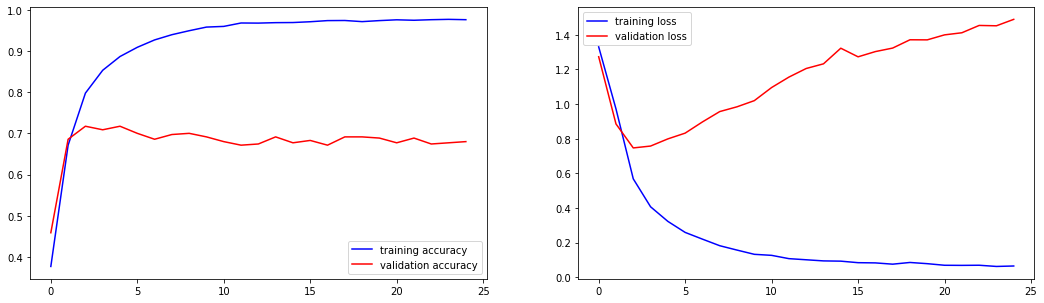

In [33]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(X_epoch, X_acc_train, color='b', label='training accuracy')
plt.plot(X_epoch, X_acc_val, color='r', label='validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_epoch, X_loss_train, color='b', label='training loss')
plt.plot(X_epoch, X_loss_val, color='r', label='validation loss')
plt.legend()

plt.show()

<font style="font-size:20px; font-family:Andale Mono,monospace;">From the graph on left hand side, we could see that the model achieved low testing accuracy compared to its training accuracy. From the graph on right hand side, we could see the validation loss increasing as the number of epochs increasing, and the validation loss is much higher than training loss as the epochs increases. Those two graph shows that the model is probably overfitting.</font>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 7</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Answer</font>

<font style="font-size:20px; font-family:Andale Mono,monospace;">To utilize those "word" vectors to represent the sentence data and train the model, we could do the 'Padding Sequence' to the word vectors. 'Padding Sequence' is to make sure all word vectors are in the same dimension so that model could fit those words vectors.</font>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 8</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [34]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [35]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

<font style="font-size:15px; font-family:Comic Sans MS;">My answer</font>

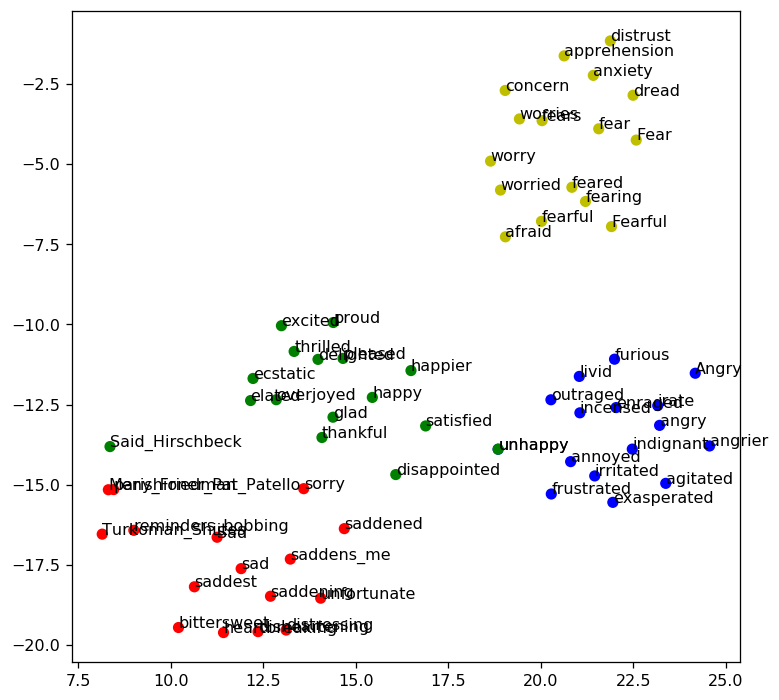

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

<div style="background-color:lightblue;">
    <center>
        <h3 style="color:red; font-size:24px; font-family:Segoe Print;">Kaggle Competition</h3>
    </center>
</div>

<font style="font-size:20px; font-family:Andale Mono,monospace;">Here is the report for what I have done so far for the competition.Please click the link.If there is any problem to open it (Google Chrome will block it), please refer to the 108065511_Report.pdf in the report folder</font>
<br />
<a style="font-size:20px; font-family:Andale Mono,monospace;" href='./report/108065511_Report.pdf'>108065511_Report</a>